In [16]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.cluster.vq import kmeans,vq
from numpy import vstack,array
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

# Core Libraries - Machine Learning
import sklearn
 
# Importing Clustering - Modelling
from sklearn.cluster import KMeans


# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
stock_data = pd.read_csv('C:\Acadgild Desk\data_stocks.csv')
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [20]:
stock_data.shape

(41266, 502)

In [21]:
stock_data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [22]:
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [23]:
stock_data.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [24]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [25]:
stock_data.get_dtype_counts()

float64    501
int64        1
dtype: int64

In [26]:
stock_data.isna().sum().sum()

0

In [27]:
stock_data[stock_data==0].any().sum()


0

In [28]:
stock_data.describe()    

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002390A1CD7B8>,
      dtype=object)

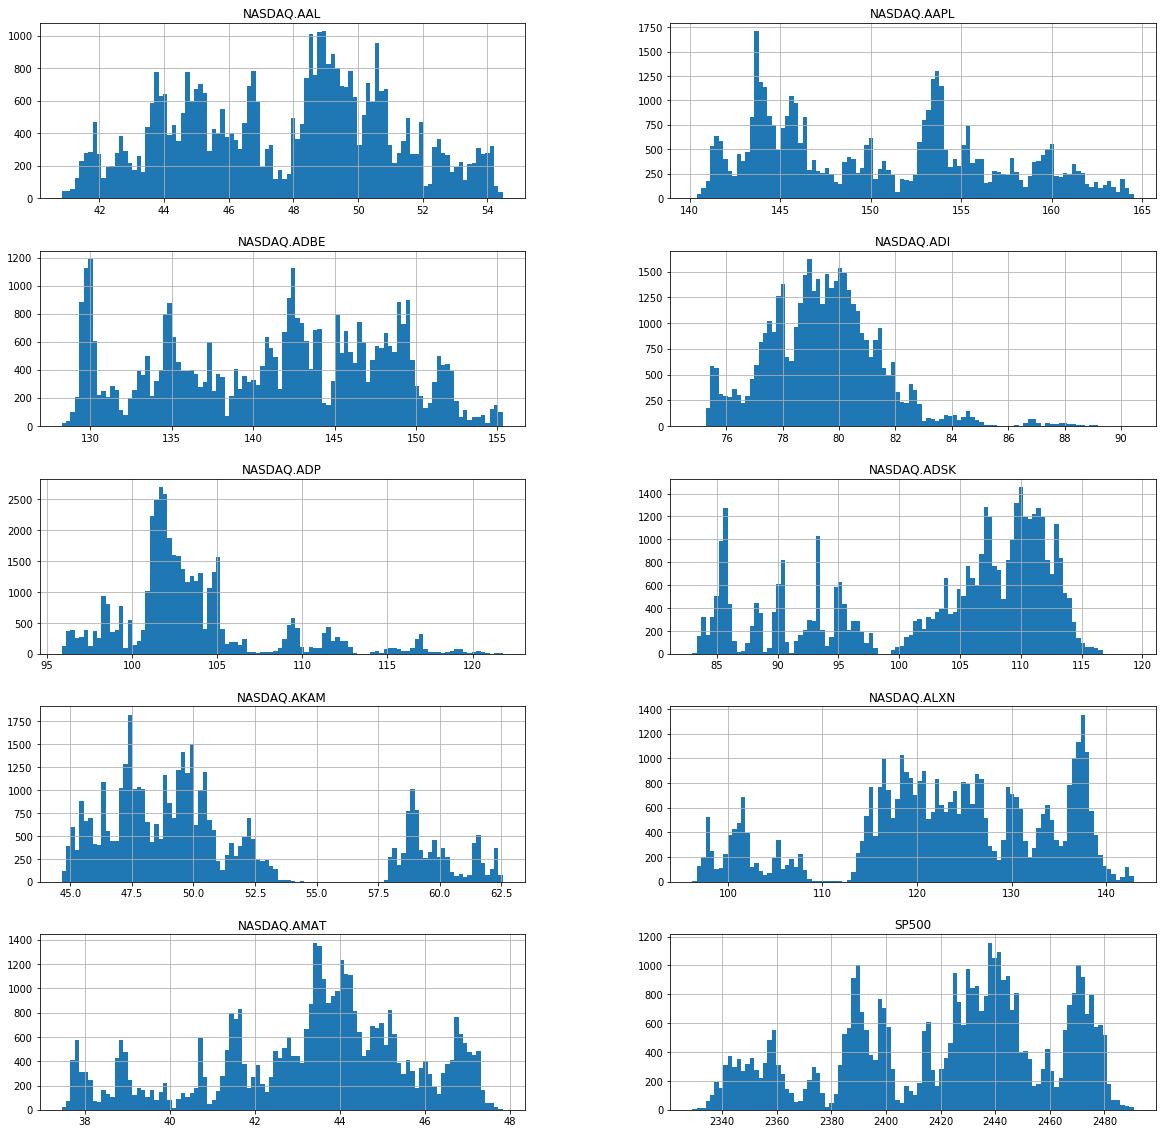

In [29]:
stock_data.iloc[:,1:11].hist(bins=100, figsize=(20,20), layout=(5,2))

Time Series Plot using Epoch time

<Figure size 1440x1440 with 0 Axes>

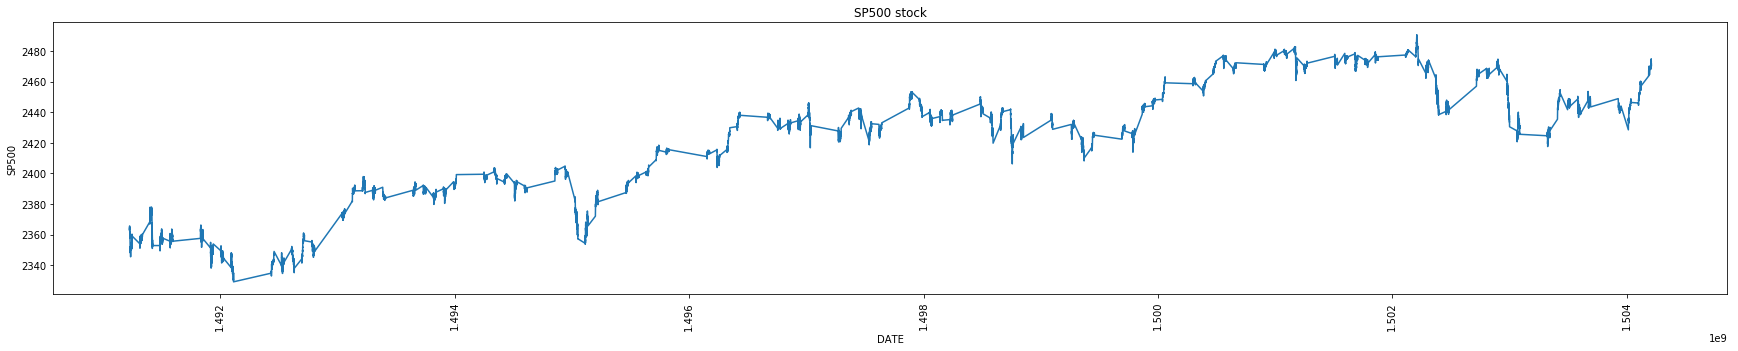

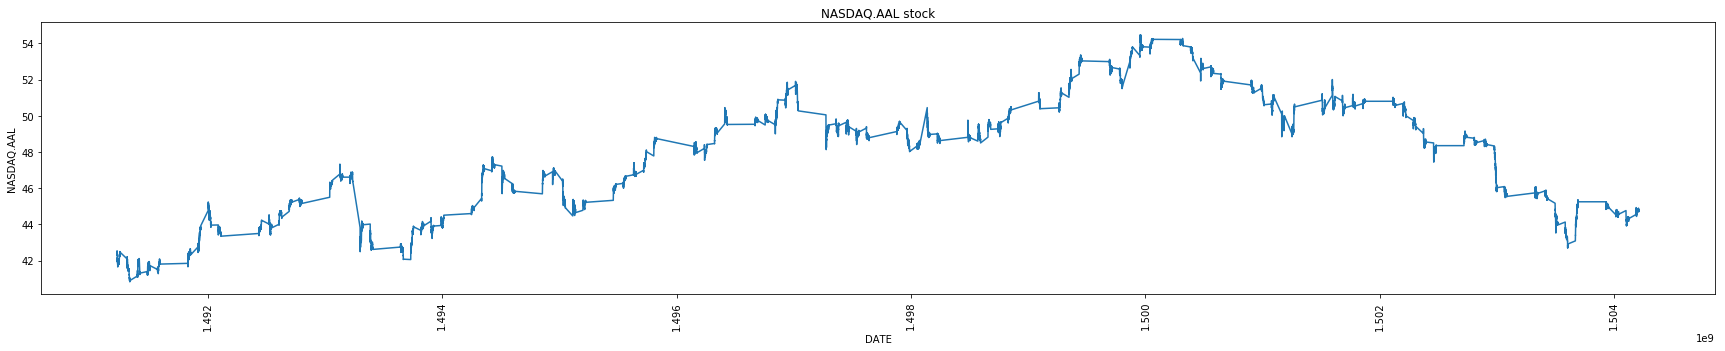

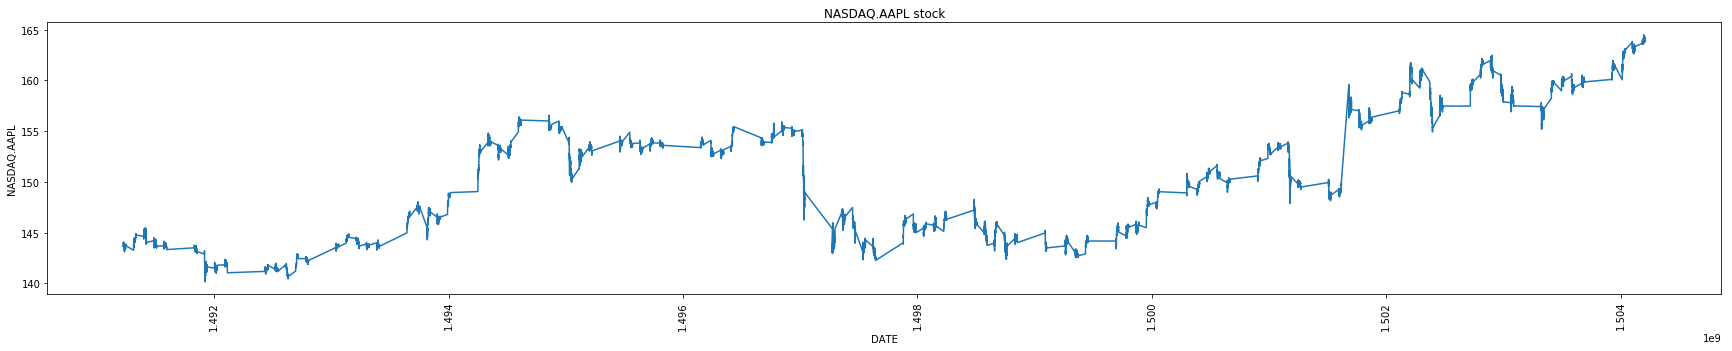

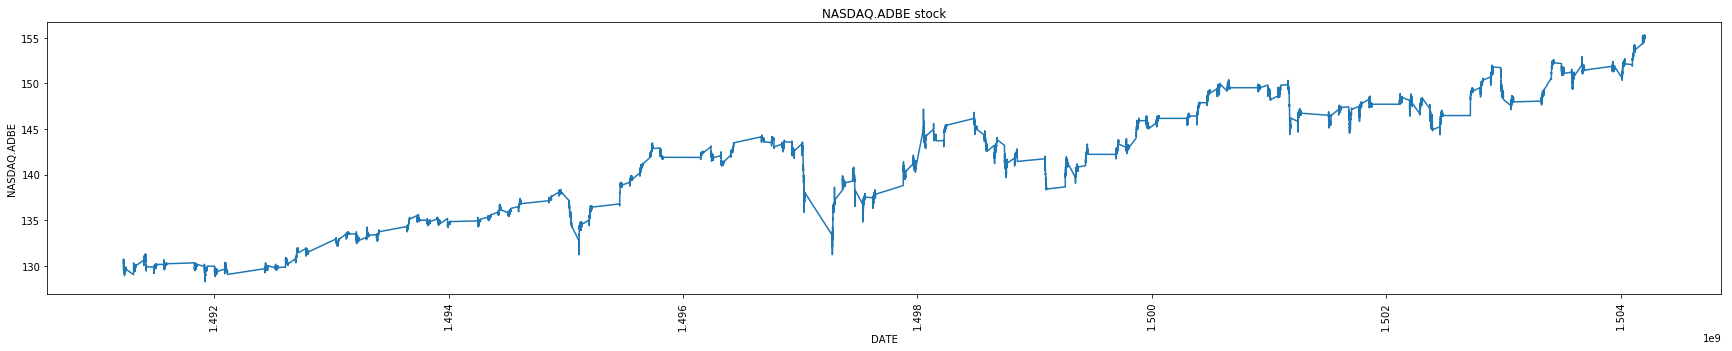

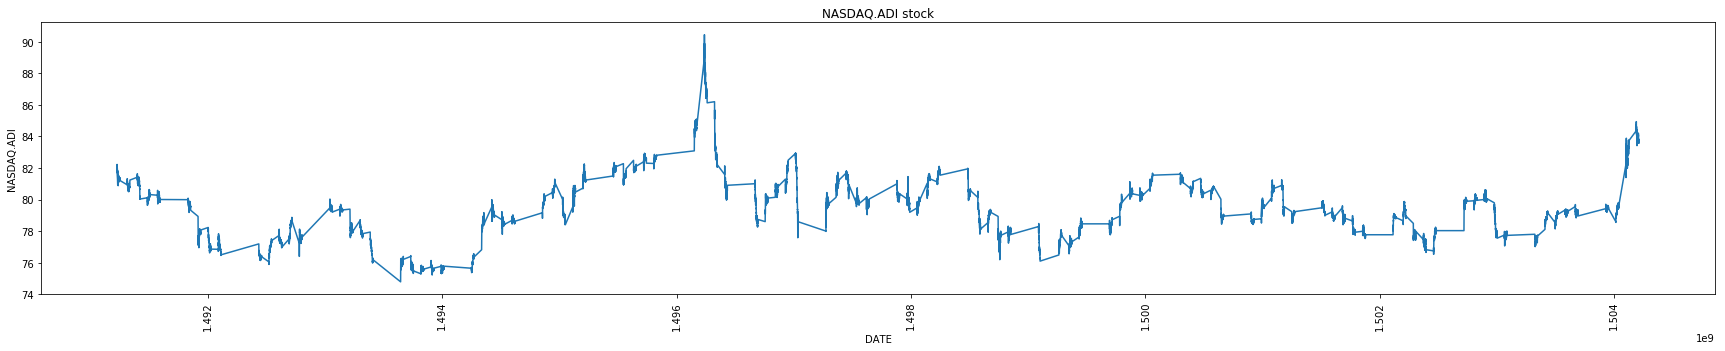

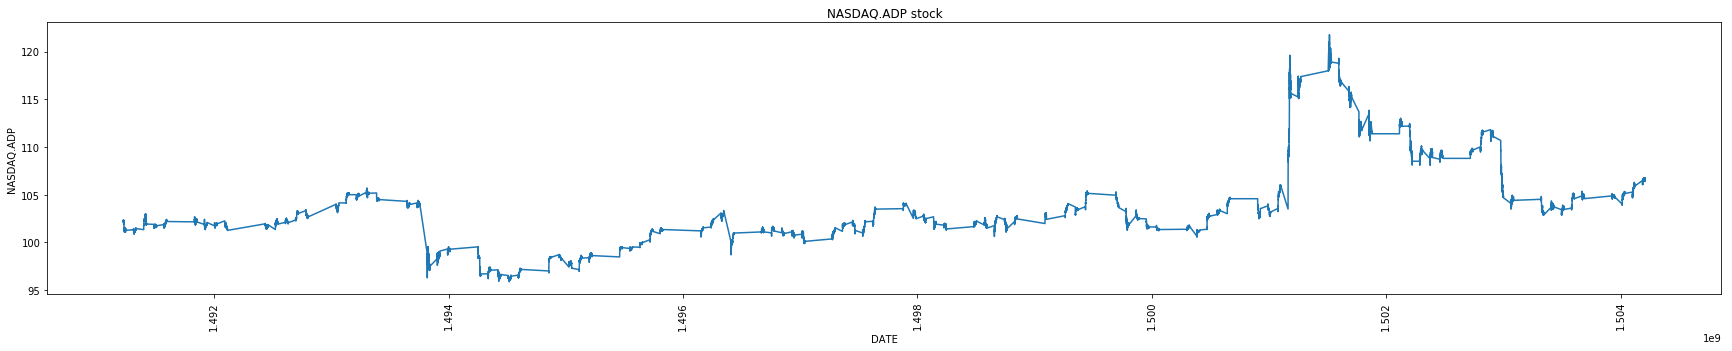

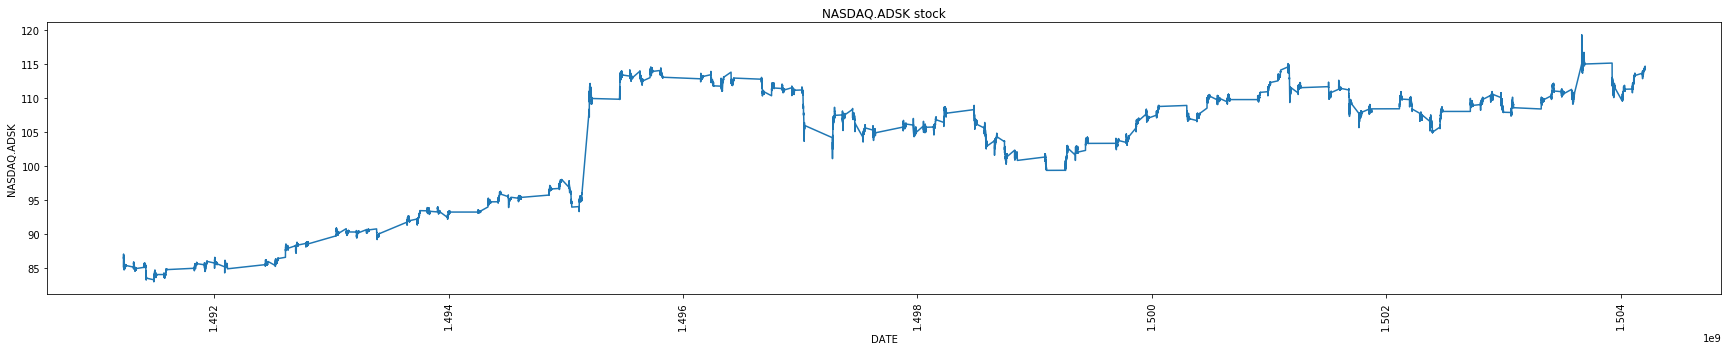

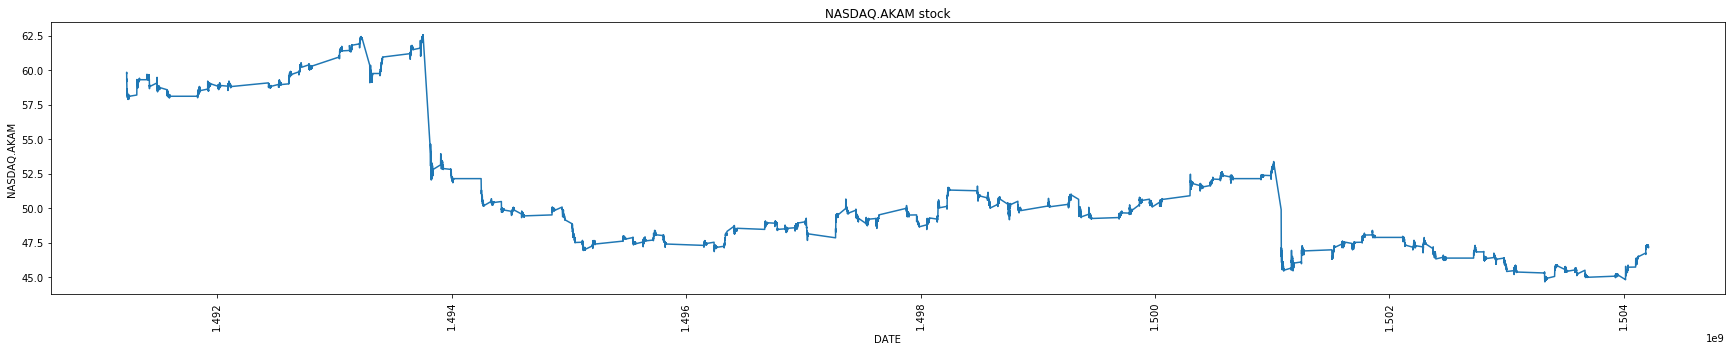

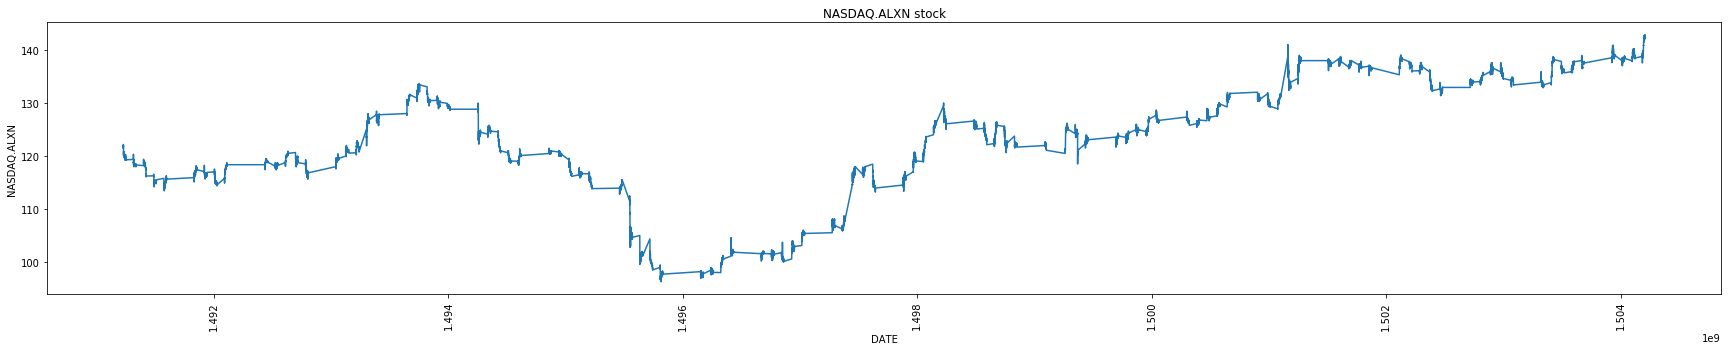

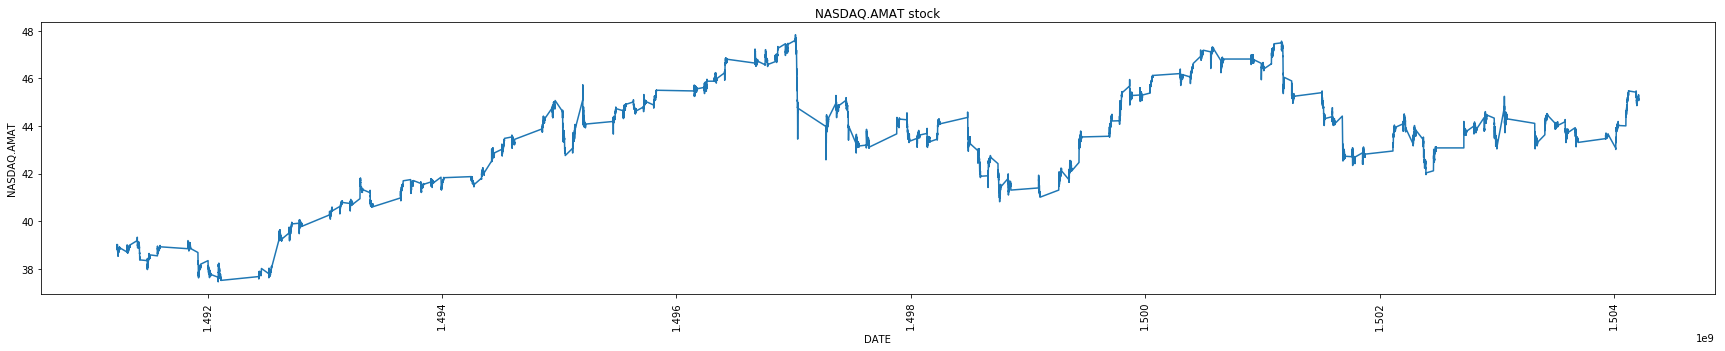

In [30]:
plt.figure(figsize= (20,20))
for i,col in enumerate(stock_data.iloc[:,0:11].columns.values):
    if i==0:
        continue
    else:
        plt.figure(figsize= (30,5))
        plt.title(col + ' stock')
        plt.xlabel('Date')
        plt.ylabel('Stock value ' + str(col))
        plt.xticks(rotation=90)
        sns.lineplot(stock_data.iloc[:,0],stock_data.iloc[:,i])

Time Series Plot using Date Only

<Figure size 1440x1440 with 0 Axes>

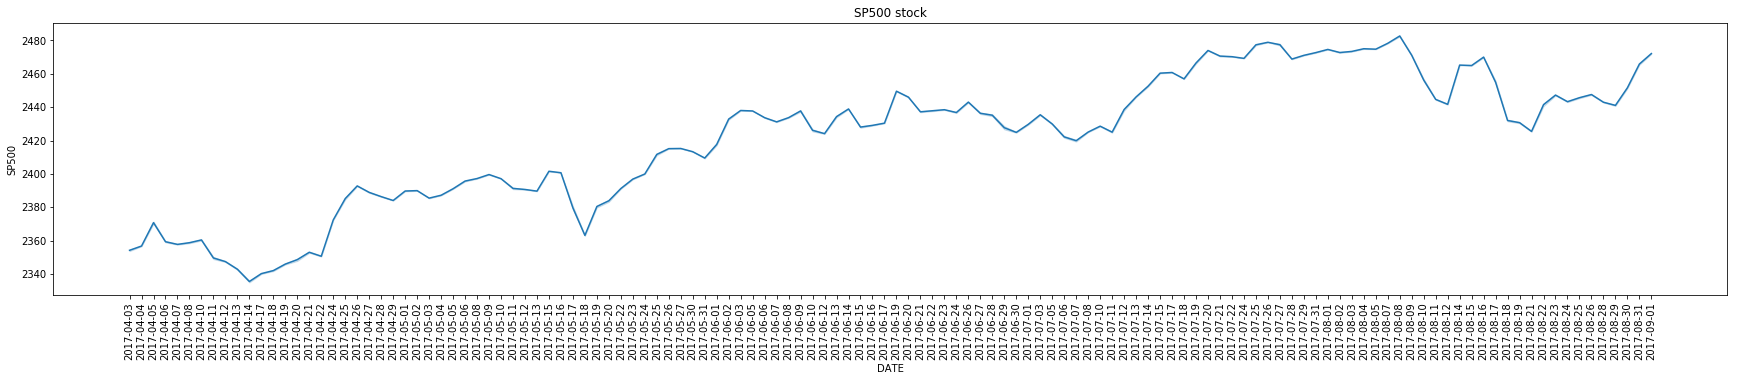

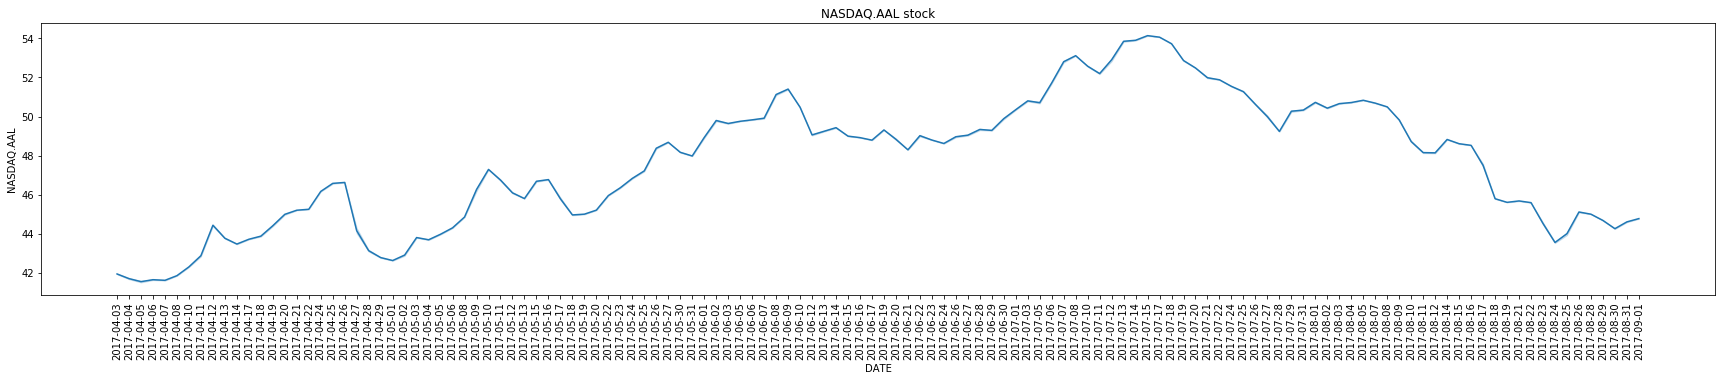

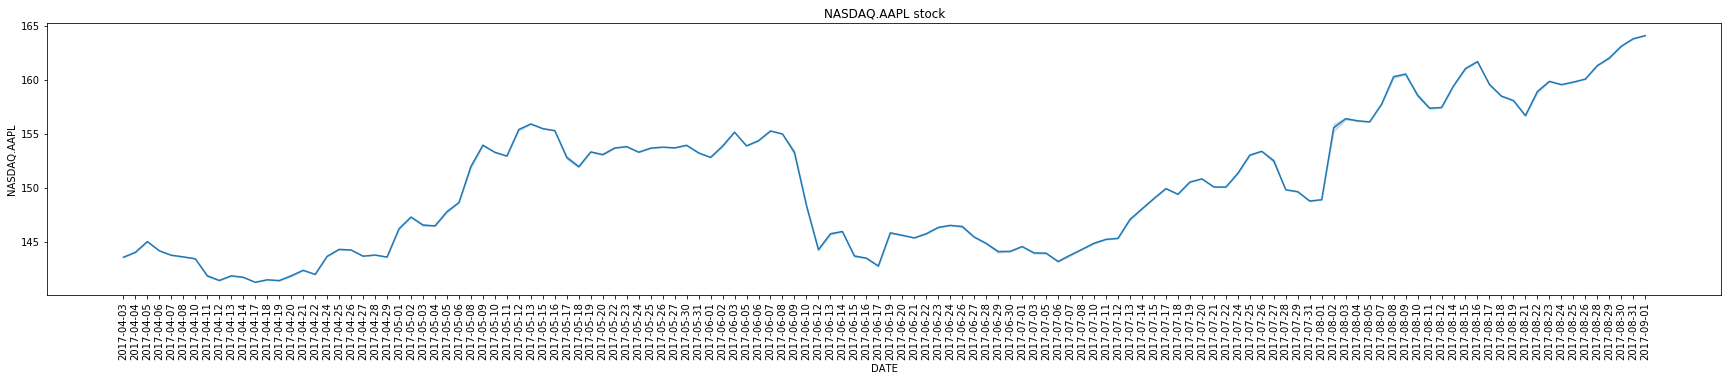

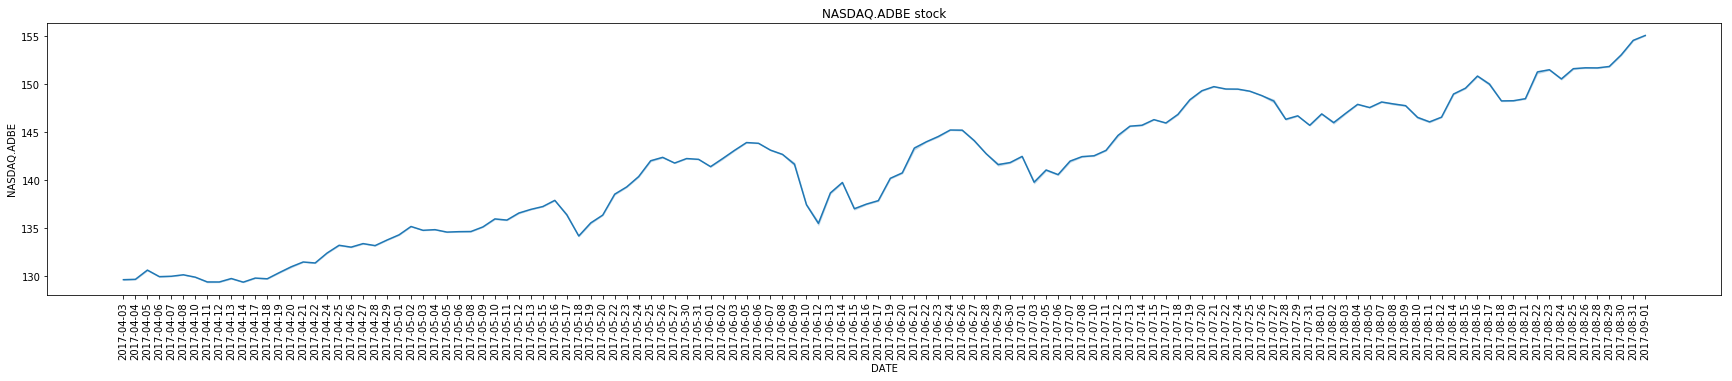

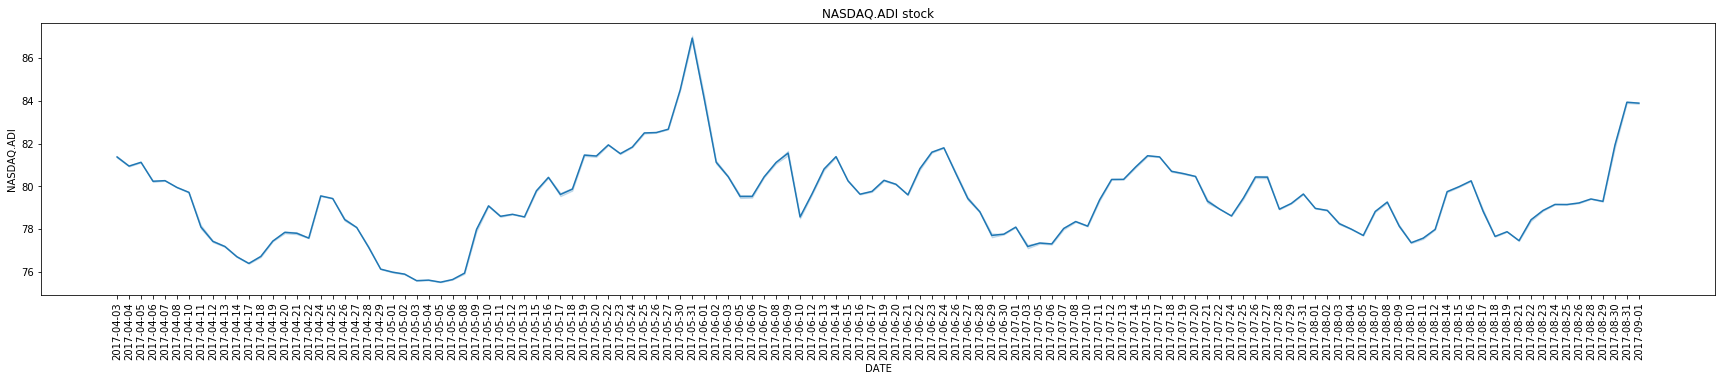

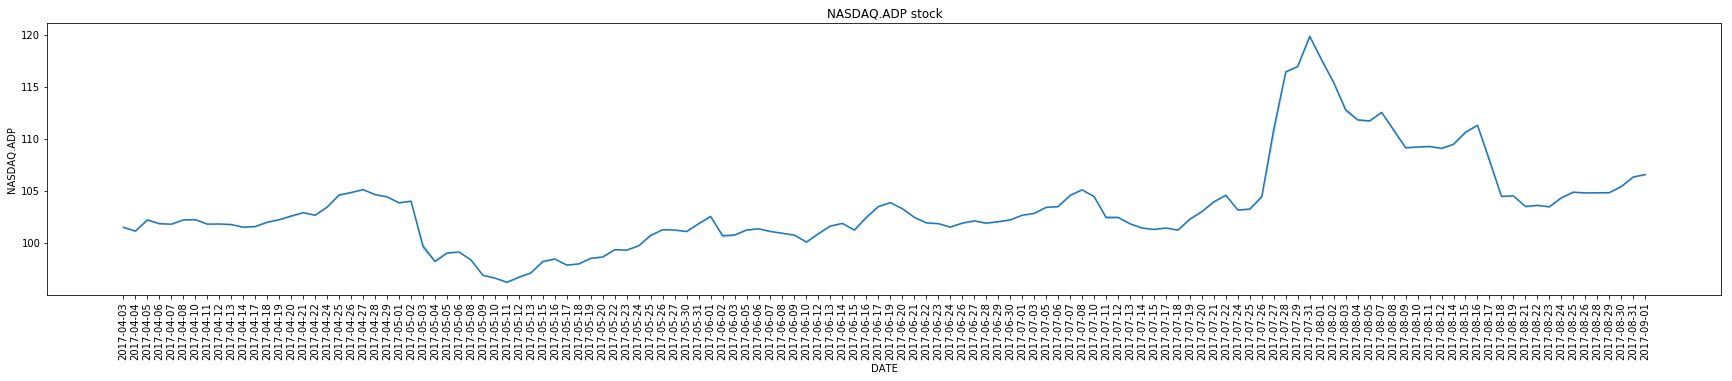

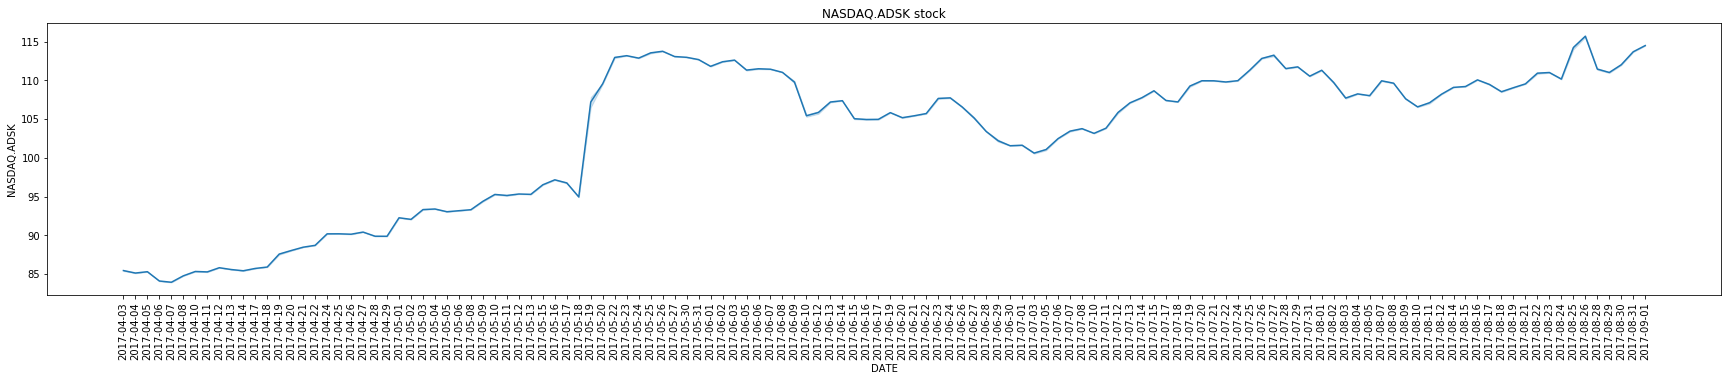

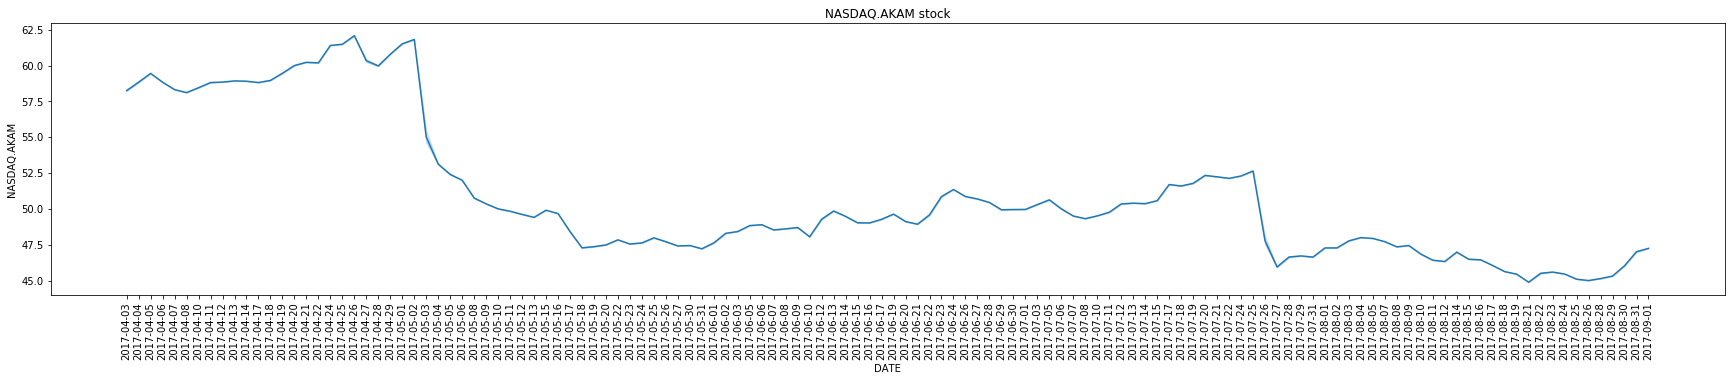

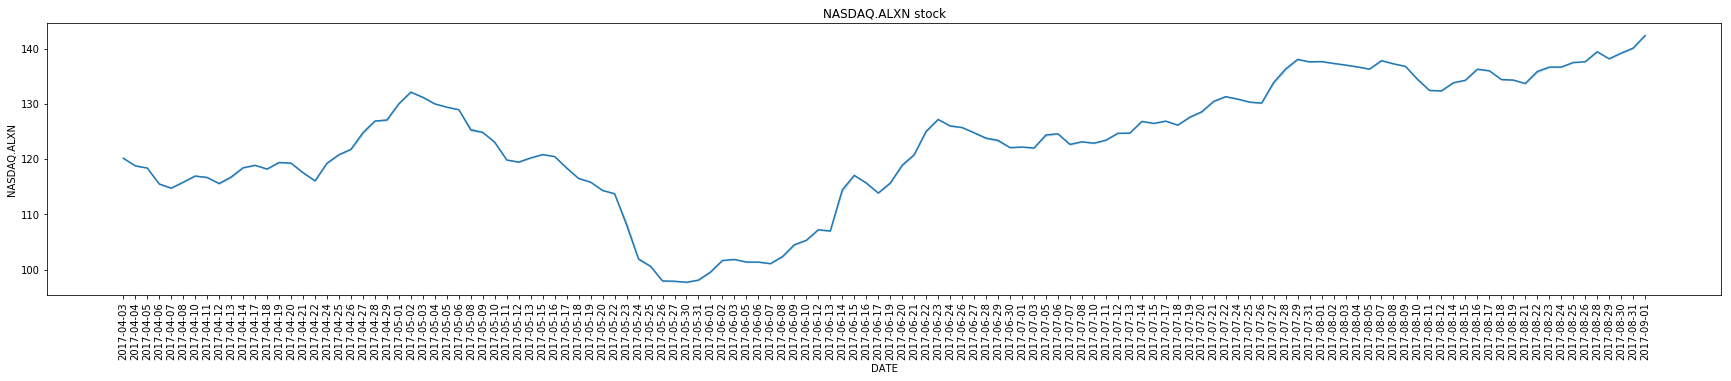

In [31]:
import datetime as dt
plt.figure(figsize= (20,20))
for i,col in enumerate(stock_data.iloc[:,0:10].columns.values):
    if i==0:
        continue
    else:
        plt.figure(figsize= (30,5))
        plt.title(col + ' stock')
        plt.xlabel('Date')
        plt.ylabel('Stock value ' + str(col))
        plt.xticks(rotation=90)
        sns.lineplot(stock_data.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d')),
                     stock_data.iloc[:,i],)

In [32]:
date_df = pd.DataFrame()
date_df['date'] = stock_data.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
date_df['time'] = stock_data.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%X'))
date_df.head()

,date,time
0,2017-04-03,19:00:00
1,2017-04-03,19:01:00
2,2017-04-03,19:02:00
3,2017-04-03,19:03:00
4,2017-04-03,19:04:00


In [33]:
date_df.groupby(by='date').count().shape

(128, 1)

In [34]:
stock_prices = stock_data.drop('DATE', axis =1)

Text(0.5, 1.0, 'Elbow curve')

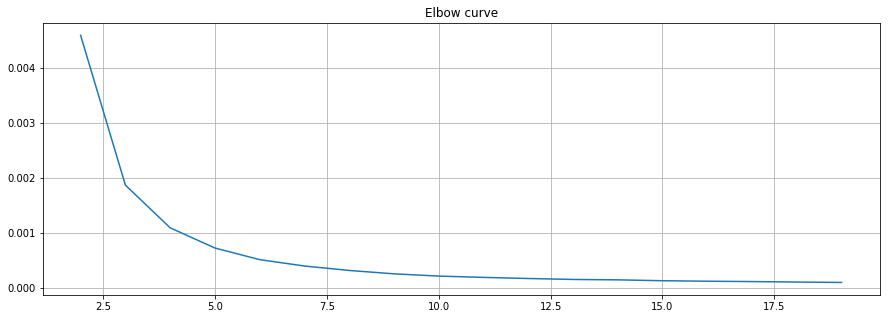

In [35]:
# Calculate average annual percentage return and volatilities over the time period of the data in the dataset
performance = stock_prices.pct_change().mean() * 128
performance = pd.DataFrame(performance)
performance.columns = ['Performance']
performance['Volatility'] = stock_prices.pct_change().std() * sqrt(128)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(performance['Performance']),np.asarray(performance['Volatility'])]).T

X = data
wc_sse = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wc_sse.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wc_sse)
plt.grid(True)
plt.title('Elbow curve')





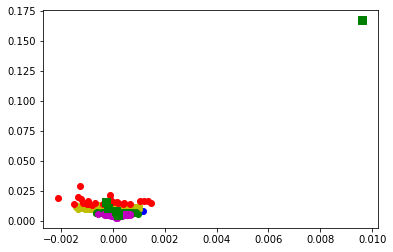

In [36]:
#computing K-Means with K = 6 (6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

In [37]:
#identify the outlier
print(performance.idxmax())

Performance    NYSE.XRX
Volatility     NYSE.XRX
dtype: object


In [38]:
#drop the relevant stock from our data
performance.drop('NYSE.XRX',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(performance['Performance']),np.asarray(performance['Volatility'])]).T

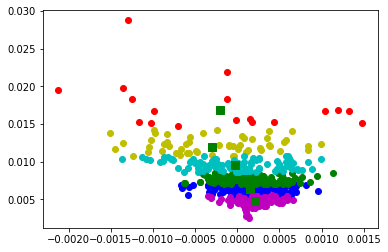

In [39]:

# computing K-Means with K = 6(6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance?

In [40]:
similar_performance = [(name,cluster) for name, cluster in zip(performance.index.values,idx)]
similar_performance

[('SP500', 4),
 ('NASDAQ.AAL', 5),
 ('NASDAQ.AAPL', 3),
 ('NASDAQ.ADBE', 0),
 ('NASDAQ.ADI', 5),
 ('NASDAQ.ADP', 3),
 ('NASDAQ.ADSK', 1),
 ('NASDAQ.AKAM', 1),
 ('NASDAQ.ALXN', 1),
 ('NASDAQ.AMAT', 5),
 ('NASDAQ.AMD', 2),
 ('NASDAQ.AMGN', 0),
 ('NASDAQ.AMZN', 3),
 ('NASDAQ.ATVI', 5),
 ('NASDAQ.AVGO', 5),
 ('NASDAQ.BBBY', 5),
 ('NASDAQ.BIIB', 3),
 ('NASDAQ.CA', 5),
 ('NASDAQ.CBOE', 0),
 ('NASDAQ.CELG', 3),
 ('NASDAQ.CERN', 3),
 ('NASDAQ.CHRW', 3),
 ('NASDAQ.CHTR', 5),
 ('NASDAQ.CINF', 0),
 ('NASDAQ.CMCSA', 0),
 ('NASDAQ.CME', 0),
 ('NASDAQ.COST', 3),
 ('NASDAQ.CSCO', 3),
 ('NASDAQ.CSX', 3),
 ('NASDAQ.CTAS', 3),
 ('NASDAQ.CTSH', 0),
 ('NASDAQ.CTXS', 5),
 ('NASDAQ.DISCA', 5),
 ('NASDAQ.DISCK', 5),
 ('NASDAQ.DISH', 5),
 ('NASDAQ.DLTR', 1),
 ('NASDAQ.EA', 5),
 ('NASDAQ.EBAY', 3),
 ('NASDAQ.EQIX', 3),
 ('NASDAQ.ESRX', 5),
 ('NASDAQ.ETFC', 5),
 ('NASDAQ.EXPD', 0),
 ('NASDAQ.EXPE', 3),
 ('NASDAQ.FAST', 5),
 ('NASDAQ.FB', 0),
 ('NASDAQ.FFIV', 5),
 ('NASDAQ.FISV', 4),
 ('NASDAQ.FITB', 5),
 ('NASD

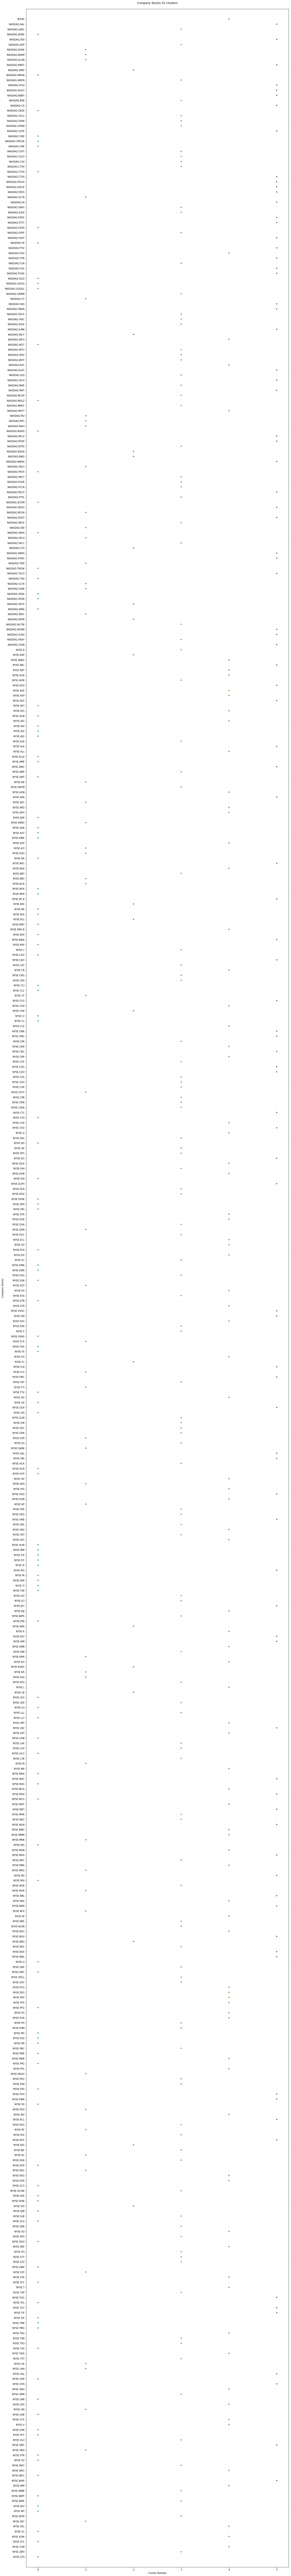

In [41]:
plt.figure(figsize = (20,200))
plt.title('Company Stocks Vs Clusters\n')
plt.ylim(-2,len(performance.index.values)+1)
plt.xlabel('Cluster Number')
plt.ylabel('Company Stocks')
plt.gca().invert_yaxis()
plt.grid(axis='both', alpha= 0.1)

sns.scatterplot(x=idx, y= performance.index.values, hue = idx,palette= 'Dark2', legend= False)

Identify which all stocks are moving together and which all stocks are different from each other?

In [42]:
moving_together = [(name,cluster) for name, cluster in zip(performance.index.values,idx)]
moving_together

[('SP500', 4),
 ('NASDAQ.AAL', 5),
 ('NASDAQ.AAPL', 3),
 ('NASDAQ.ADBE', 0),
 ('NASDAQ.ADI', 5),
 ('NASDAQ.ADP', 3),
 ('NASDAQ.ADSK', 1),
 ('NASDAQ.AKAM', 1),
 ('NASDAQ.ALXN', 1),
 ('NASDAQ.AMAT', 5),
 ('NASDAQ.AMD', 2),
 ('NASDAQ.AMGN', 0),
 ('NASDAQ.AMZN', 3),
 ('NASDAQ.ATVI', 5),
 ('NASDAQ.AVGO', 5),
 ('NASDAQ.BBBY', 5),
 ('NASDAQ.BIIB', 3),
 ('NASDAQ.CA', 5),
 ('NASDAQ.CBOE', 0),
 ('NASDAQ.CELG', 3),
 ('NASDAQ.CERN', 3),
 ('NASDAQ.CHRW', 3),
 ('NASDAQ.CHTR', 5),
 ('NASDAQ.CINF', 0),
 ('NASDAQ.CMCSA', 0),
 ('NASDAQ.CME', 0),
 ('NASDAQ.COST', 3),
 ('NASDAQ.CSCO', 3),
 ('NASDAQ.CSX', 3),
 ('NASDAQ.CTAS', 3),
 ('NASDAQ.CTSH', 0),
 ('NASDAQ.CTXS', 5),
 ('NASDAQ.DISCA', 5),
 ('NASDAQ.DISCK', 5),
 ('NASDAQ.DISH', 5),
 ('NASDAQ.DLTR', 1),
 ('NASDAQ.EA', 5),
 ('NASDAQ.EBAY', 3),
 ('NASDAQ.EQIX', 3),
 ('NASDAQ.ESRX', 5),
 ('NASDAQ.ETFC', 5),
 ('NASDAQ.EXPD', 0),
 ('NASDAQ.EXPE', 3),
 ('NASDAQ.FAST', 5),
 ('NASDAQ.FB', 0),
 ('NASDAQ.FFIV', 5),
 ('NASDAQ.FISV', 4),
 ('NASDAQ.FITB', 5),
 ('NASD

 NASDAQ.AAPL

In [7]:
#df['new']=df['DATE'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")

# Durbin_watson test is used to check the presence of Autocorrelation in residuals in regression analysis.
#The Durbin-Watson statistic is always between 0 and 4.
#A value of 2 means that there is no autocorrelation in the sample. 
#Values from 0 to less than 2 indicate positive autocorrelation and values from more than 2 to 4 indicate negative autocorrelation.

import statsmodels.api as sm
stock_data['log_AAPL']=np.log(stock_data['NASDAQ.AAPL'])
sm.stats.durbin_watson(stock_data['log_AAPL'])

1.5195875753588083e-08

In [8]:
stock_data['log_AAPL'].head()

0    4.967589
1    4.967728
2    4.967659
3    4.967310
4    4.967449
Name: log_AAPL, dtype: float64

In [10]:
stock_data['NDATE']=pd.to_datetime(stock_data['DATE'],unit='s')

stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,log_AAPL,NDATE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,2017-04-03 13:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,2017-04-03 13:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,2017-04-03 13:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,2017-04-03 13:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,2017-04-03 13:34:00


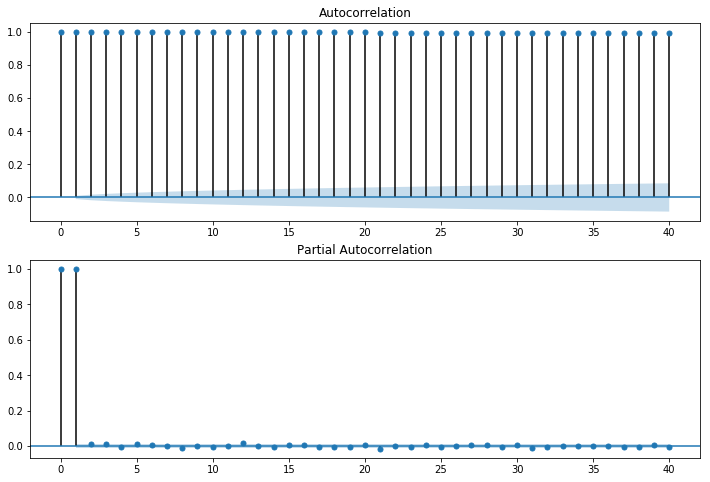

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

# for Auto-correlation plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_data['log_AAPL'].values.squeeze(), lags=40, ax=ax1)

#for partial Auto-correlation plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_data['log_AAPL'], lags=40, ax=ax2)

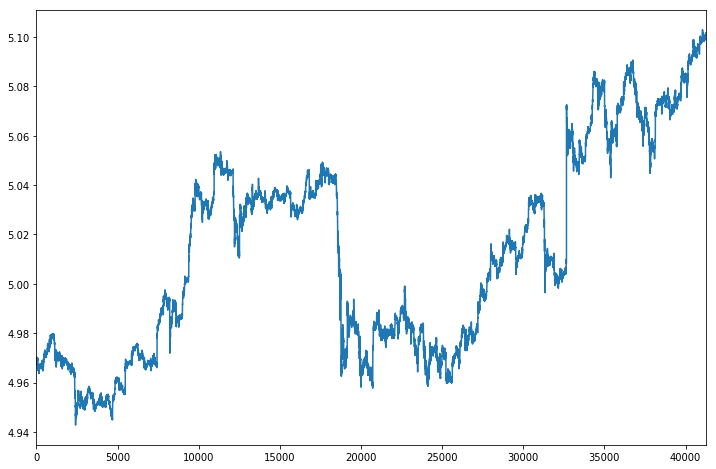

In [12]:
stock_data['log_AAPL'].plot(figsize=(12,8));

In [14]:
AAPL_array=stock_data["log_AAPL"].dropna().as_matrix()

In [17]:
model = ARIMA(AAPL_array, (2,2,1)).fit()
print(model.params)

[-1.46942646e-09 -2.15706756e-02 -2.60067096e-02 -9.68668703e-01]


In [18]:
print(model.aic,model.bic,model.hqic)

-492060.6927971314 -492017.5540684908 -492047.0581161025


In [21]:
best_values=[0,0,0]
best_aic=1e20

In [22]:
try:
    for p in range(3):
        for d in range(3):
            for q in range(3):
                model=ARIMA(AAPL_array, (p,d,q)).fit()
                if model.aic < best_aic:
                    best_values=[p,d,q]
except:
    pass
print(best_values)

[0, 2, 1]


In [23]:
AAPL_pred=model.predict()
AAPL_pred

array([-4.34216349e-09,  1.04035629e-04,  2.55907054e-04, ...,
       -5.36026905e-05,  6.76981080e-04,  7.98503329e-04])

In [25]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(stock_data['log_AAPL'][2:],AAPL_pred))

25.129936367032478


NASDAQ.ADP

In [51]:
import statsmodels.api as sm
stock_data['NASDAQ.ADP']=np.log(stock_data['NASDAQ.ADP'])
sm.stats.durbin_watson(stock_data['NASDAQ.ADP'])

2.270798861744159e-08

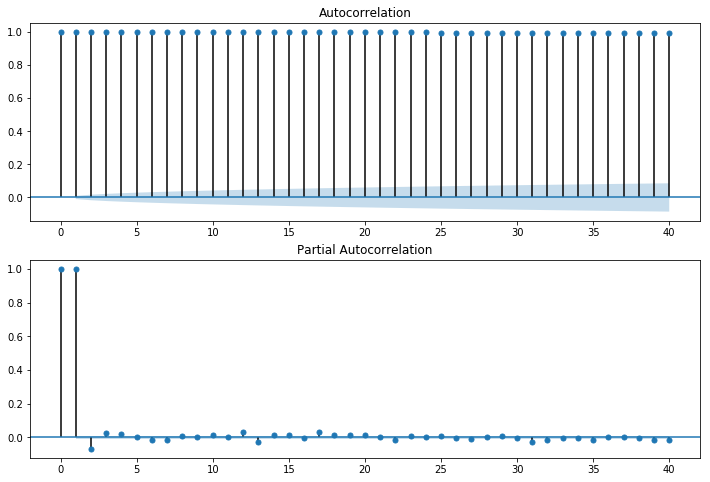

In [53]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

# for Auto-correlation plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_data['NASDAQ.ADP'].values.squeeze(), lags=40, ax=ax1)

#for partial Auto-correlation plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_data['NASDAQ.ADP'], lags=40, ax=ax2)

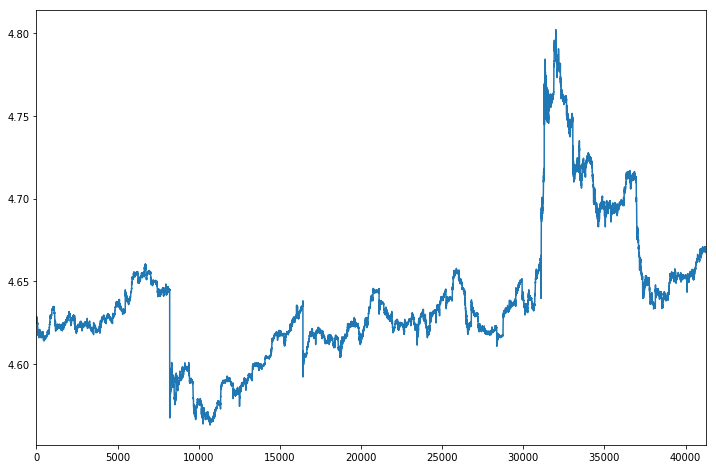

In [54]:
stock_data['NASDAQ.ADP'].plot(figsize=(12,8));

In [55]:
ADP_array=stock_data["NASDAQ.ADP"].dropna().as_matrix()

In [56]:
model = ARIMA(ADP_array, (2,2,1)).fit()
print(model.params)

[ 8.83239478e-10  6.83234131e-02 -1.36926594e-02 -9.91458409e-01]


In [57]:
print(model.aic,model.bic,model.hqic)

-482504.9039084211 -482461.7651797805 -482491.26922739216


In [58]:
best_values=[0,0,0]

best_values

[0, 0, 0]

In [59]:
best_aic=1e20

In [62]:
try:
    for p in range(3):
        for d in range(3):
            for q in range(3):
                model=ARIMA(ADP_array, (p,d,q)).fit()
                if model.aic < best_aic:
                    best_values=[p,d,q]
except:
    pass
print(best_values)

[0, 0, 1]


In [63]:
ADP_array=model.predict()
ADP_array

array([4.63850181, 4.63286388, 4.634156  , ..., 4.65486826, 4.65180938,
       4.65371856])

In [64]:
len(ADP_array)

41266

In [67]:
len(stock_data['NASDAQ.ADP'])

41266

NASDAQ.CBOE

In [35]:
##log transformation
stock_data['log_CBoE']=np.log(stock_data['NASDAQ.CBOE'])

# creating matrix
CBoE_array=stock_data["log_CBoE"].dropna().as_matrix()

# residuals
stock_data['diff_log_CBoE']= stock_data["log_CBoE"]- stock_data["log_CBoE"].shift(periods=-1)

#Building model
model_CBoE = ARIMA(CBoE_array, (2,2,1)).fit()

# prediction
predCBoE=model_CBoE.predict()

In [36]:
print(model_CBoE.aic)
print(model_CBoE.bic)


-506313.8443954519
-506270.70566681126


In [37]:
predCBoE=model_CBoE.predict()

In [39]:
rmse_CBoE=np.sqrt(mean_squared_error(stock_data['diff_log_CBoE'][1:-1],predCBoE))
rmse_CBoE

0.0007971976394257831

In [40]:
np.exp(rmse_CBoE)

1.0007975154859206

NASDAQ.CSCO

In [42]:
from sklearn.metrics import mean_squared_error


df2=stock_data.copy()


df2['CSCO_log']=np.log(df2['NASDAQ.CSCO'])
CSCO_array=df2['CSCO_log'].dropna().as_matrix()

df2['diff_CSCO_log']= df2['CSCO_log']-df2["CSCO_log"].shift(periods=-1) #Here periods=-1 is used beacuse current row is subtracted from next row 

model_CSCO = ARIMA(CSCO_array, (2,2,1)).fit()
df2['diff_CSCO_log'].shape

(41266,)

In [43]:
rmse=np.sqrt(mean_squared_error(df2['diff_CSCO_log'][1:-1],model_CSCO.predict()))
rmse

0.0009163582680712411

In [44]:
model_CSCO.aic

-486449.69776279543

In [45]:
pred_CSCO=model_CSCO.predict()
pred_CSCO

array([-6.59163393e-10,  1.69687255e-03,  2.54435476e-03, ...,
       -5.11271200e-04, -5.14916818e-05,  1.12670049e-04])

In [46]:
rmse_CSCO=np.sqrt(mean_squared_error(df2['diff_CSCO_log'][1:-1],pred_CSCO))
np.exp(rmse_CSCO)

1.0009167782525845

NASDAQ.EBAY

In [47]:
stock_data['log_EBAY']=np.log(stock_data['NASDAQ.EBAY'])
Ebay_array=stock_data["log_EBAY"].dropna().as_matrix()
stock_data['diff_log_EBAY']= stock_data["log_EBAY"]-stock_data["log_EBAY"].shift(periods=-1)
model_Ebay = ARIMA(Ebay_array, (2,2,1)).fit()
predEbay=model_Ebay.predict()

In [49]:
rmse_ebay=np.sqrt(mean_squared_error(stock_data['diff_log_EBAY'][1:-1],predEbay))
rmse_ebay


0.0009745452721053408

In [50]:
np.exp(rmse_ebay)

1.000975020295647